In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [4]:
fashion_train_df= pd.read_csv('fashion-mnist_train.csv')
fashion_test_df = pd.read_csv('fashion-mnist_test.csv')


In [5]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
fashion_train_df.tail()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
fashion_train_df.shape

(60000, 785)

In [8]:
fashion_test_df.shape

(10000, 785)

In [9]:
training = np.array(fashion_train_df,dtype='float32')
testing = np.array(fashion_test_df,dtype='float32')
training.shape


(60000, 785)

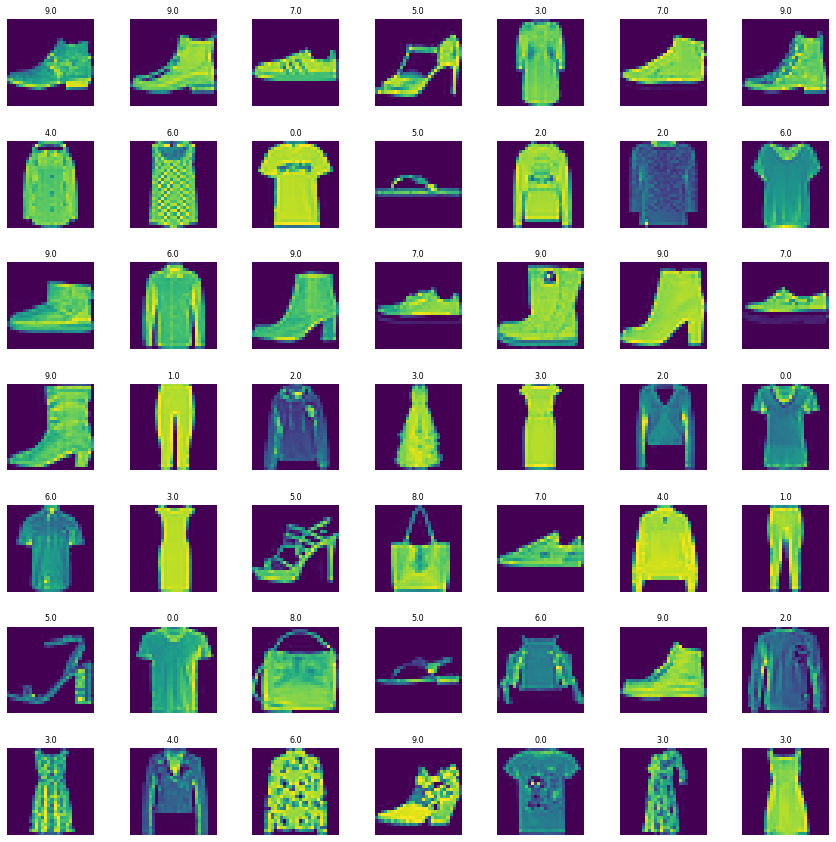

In [22]:
import random
W_grid = 7
L_grid = 7
fig,axes = plt.subplots(L_grid,W_grid,figsize =(15,15))
axes = axes.ravel()
n_training = len(training)

for i in np.arange(0,W_grid*L_grid):
    index = np.random.randint(0,n_training)
    axes[i].imshow(training[index,1:].reshape((28,28)))
    axes[i].set_title(training[index,0],fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)


In [11]:
# x and y split
X_train = training[:,1:]/255
y_train = training[:,0]
X_test = testing[:,1:]/255
y_test = testing[:,0]


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train,test_size = 0.2,random_state = 12345)
X_train = X_train.reshape(X_train.shape[0],*(28,28,1))
X_test = X_test.reshape(X_test.shape[0],*(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0],*(28,28,1))


In [13]:
X_train.shape

(48000, 28, 28, 1)

In [14]:
X_test.shape


(10000, 28, 28, 1)

In [15]:
X_validate.shape

(12000, 28, 28, 1)

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard


cnn_model = Sequential()
cnn_model.add(Conv2D(32,3,3,input_shape = (28,28,1),activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size= (2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(32,activation = 'relu'))
cnn_model.add(Dense(10,activation = 'sigmoid'))
cnn_model.compile(loss ='sparse_categorical_crossentropy',optimizer = Adam(learning_rate=0.001),metrics= ['accuracy'])

epochs = 200
cnn_model.fit(X_train,y_train,batch_size =512,epochs = epochs,verbose = 1,validation_data = (X_validate,y_validate) )


Epoch 1/200
94/94 [==============================] - 3s 23ms/step - loss: 1.4246 - accuracy: 0.5678 - val_loss: 0.7954 - val_accuracy: 0.7244
Epoch 2/200
94/94 [==============================] - 2s 19ms/step - loss: 0.6968 - accuracy: 0.7532 - val_loss: 0.6302 - val_accuracy: 0.7713
Epoch 3/200
94/94 [==============================] - 2s 21ms/step - loss: 0.5956 - accuracy: 0.7855 - val_loss: 0.5836 - val_accuracy: 0.7869
Epoch 4/200
94/94 [==============================] - 2s 21ms/step - loss: 0.5538 - accuracy: 0.7993 - val_loss: 0.5523 - val_accuracy: 0.8039
Epoch 5/200
94/94 [==============================] - 2s 20ms/step - loss: 0.5230 - accuracy: 0.8108 - val_loss: 0.5209 - val_accuracy: 0.8104
Epoch 6/200
94/94 [==============================] - 2s 21ms/step - loss: 0.5021 - accuracy: 0.8163 - val_loss: 0.5019 - val_accuracy: 0.8173
Epoch 7/200
94/94 [==============================] - 2s 20ms/step - loss: 0.4878 - accuracy: 0.8218 - val_loss: 0.4841 - val_accuracy: 0.8258
Epoch 

94/94 [==============================] - 2s 18ms/step - loss: 0.3307 - accuracy: 0.8790 - val_loss: 0.3598 - val_accuracy: 0.8691
Epoch 59/200
94/94 [==============================] - 2s 18ms/step - loss: 0.3291 - accuracy: 0.8809 - val_loss: 0.3708 - val_accuracy: 0.8641
Epoch 60/200
94/94 [==============================] - 2s 18ms/step - loss: 0.3275 - accuracy: 0.8799 - val_loss: 0.3649 - val_accuracy: 0.8673
Epoch 61/200
94/94 [==============================] - 2s 18ms/step - loss: 0.3280 - accuracy: 0.8810 - val_loss: 0.3769 - val_accuracy: 0.8603
Epoch 62/200
94/94 [==============================] - 2s 19ms/step - loss: 0.3275 - accuracy: 0.8807 - val_loss: 0.3629 - val_accuracy: 0.8666
Epoch 63/200
94/94 [==============================] - 2s 20ms/step - loss: 0.3287 - accuracy: 0.8780 - val_loss: 0.3669 - val_accuracy: 0.8647
Epoch 64/200
94/94 [==============================] - 2s 18ms/step - loss: 0.3237 - accuracy: 0.8817 - val_loss: 0.3625 - val_accuracy: 0.8684
Epoch 65/200

94/94 [==============================] - 2s 17ms/step - loss: 0.2835 - accuracy: 0.8962 - val_loss: 0.3505 - val_accuracy: 0.8711
Epoch 116/200
94/94 [==============================] - 2s 18ms/step - loss: 0.2835 - accuracy: 0.8950 - val_loss: 0.3493 - val_accuracy: 0.8737
Epoch 117/200
94/94 [==============================] - 2s 18ms/step - loss: 0.2799 - accuracy: 0.8976 - val_loss: 0.3487 - val_accuracy: 0.8735
Epoch 118/200
94/94 [==============================] - 2s 18ms/step - loss: 0.2792 - accuracy: 0.8975 - val_loss: 0.3559 - val_accuracy: 0.8714
Epoch 119/200
94/94 [==============================] - 2s 17ms/step - loss: 0.2812 - accuracy: 0.8956 - val_loss: 0.3485 - val_accuracy: 0.8746
Epoch 120/200
94/94 [==============================] - 2s 19ms/step - loss: 0.2771 - accuracy: 0.8990 - val_loss: 0.3515 - val_accuracy: 0.8740
Epoch 121/200
94/94 [==============================] - 2s 18ms/step - loss: 0.2789 - accuracy: 0.8974 - val_loss: 0.3478 - val_accuracy: 0.8728
Epoch 

Epoch 172/200
94/94 [==============================] - 2s 21ms/step - loss: 0.2501 - accuracy: 0.9076 - val_loss: 0.3557 - val_accuracy: 0.8737
Epoch 173/200
94/94 [==============================] - 2s 19ms/step - loss: 0.2511 - accuracy: 0.9071 - val_loss: 0.3563 - val_accuracy: 0.8733
Epoch 174/200
94/94 [==============================] - 2s 19ms/step - loss: 0.2495 - accuracy: 0.9089 - val_loss: 0.3548 - val_accuracy: 0.8752
Epoch 175/200
94/94 [==============================] - 2s 20ms/step - loss: 0.2482 - accuracy: 0.9081 - val_loss: 0.3571 - val_accuracy: 0.8740
Epoch 176/200
94/94 [==============================] - 2s 20ms/step - loss: 0.2496 - accuracy: 0.9078 - val_loss: 0.3622 - val_accuracy: 0.8749
Epoch 177/200
94/94 [==============================] - 2s 19ms/step - loss: 0.2493 - accuracy: 0.9076 - val_loss: 0.3651 - val_accuracy: 0.8691
Epoch 178/200
94/94 [==============================] - 2s 18ms/step - loss: 0.2463 - accuracy: 0.9096 - val_loss: 0.3591 - val_accuracy:

In [18]:
evaluation = cnn_model.evaluate(X_test,y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.3483 - accuracy: 0.8761
Test Accuracy : 0.876


In [19]:
predicted_classes = np.argmax(cnn_model.predict(X_test),axis=-1)
predicted_classes

313/313 [==============================] - 1s 3ms/step


array([0, 1, 6, ..., 8, 8, 1], dtype=int64)

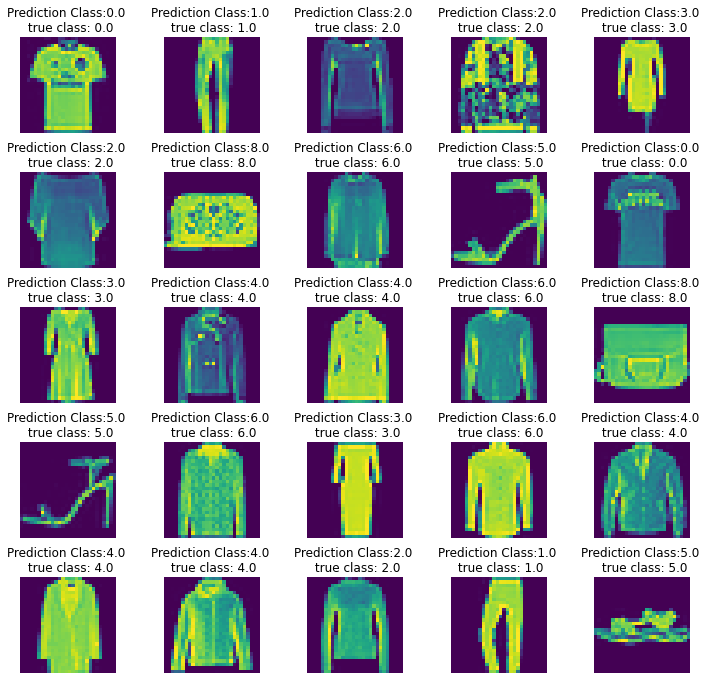

In [20]:
L = 5
W = 5
fig,axes = plt.subplots(L,W,figsize = (12,12))
axes = axes.ravel()
for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title('Prediction Class:{1} \n true class: {1}'.format(predicted_classes[i],y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace = 0.5)


In [21]:
from sklearn.metrics import classification_report
classes = 10
targets = ["Class {}".format(i) for i in range(classes)]
print(classification_report(y_test, predicted_classes, target_names = targets))

              precision    recall  f1-score   support

     Class 0       0.82      0.82      0.82      1000
     Class 1       0.97      0.98      0.97      1000
     Class 2       0.83      0.79      0.81      1000
     Class 3       0.87      0.90      0.88      1000
     Class 4       0.79      0.82      0.80      1000
     Class 5       0.97      0.94      0.96      1000
     Class 6       0.68      0.66      0.67      1000
     Class 7       0.93      0.91      0.92      1000
     Class 8       0.97      0.96      0.97      1000
     Class 9       0.92      0.97      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

